<a href="https://colab.research.google.com/github/samikshagadhave/YOLOv6_model/blob/main/Copy_of_transmission_dataset_T51%2CT52%2CT53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/meituan/YOLOv6
%cd YOLOv6
!pip install -r requirements.txt

Cloning into 'YOLOv6'...
remote: Enumerating objects: 3773, done.
remote: Counting objects: 100% (1421/1421), done.
remote: Compressing objects: 100% (293/293), done.
remote: Total 3773 (delta 1235), reused 1177 (delta 1128), pack-reused 2352
Receiving objects: 100% (3773/3773), 43.97 MiB | 31.73 MiB/s, done.
Resolving deltas: 100% (2250/2250), done.
/content/YOLOv6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have num

In [ ]:
!pip install numpy==1.23.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mwbsdPvkmXbwf9oRwN1g")
project = rf.workspace("samiksha-gadhave").project("transmission-dataset-t51-t52-t53")
dataset = project.version(1).download("mt-yolov6")
!pip install roboflow



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Transmission-dataset--T51,T52,T53-1 in mt-yolov6:: 100%|██████████| 9453/9453 [00:02<00:00, 4432.21it/s]


In [ ]:
!python tools/train.py --batch 32 --conf configs/yolov6s.py --epochs 100 --img-size 416 --data {dataset.location}/data.yaml --device 0

2023-09-18 09:56:28.927600: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 09:56:30.264929: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using 1 GPU for training... 
training args are: Namespace(data_path='/content/YOLOv6/Transmission-dataset--T51,T52,T53-1/data.yaml', conf_file='configs/yolov6s.py', img_size=416, rect=False, batch_size=32, epochs=100, workers=8, device='0', eval_interval=20, eval_final_only=False, heavy_eval_range=50, check_images=False, check_labels=False, output_dir='./runs/train', name='exp', dist_url='env://', gpu_count=0, local_rank=-1, resume=False, write_trainbatch_tb=False, stop_aug_last_n_epoch=15, save_ckpt_on_last_n_epoch=-1, distill=False, distill_feat=False, qua

In [ ]:
# Run evaluation
!python tools/eval.py --data {dataset.location}/data.yaml --img-size 416 --weights runs/train/exp/weights/best_ckpt.pt --device 0


Namespace(data='/content/YOLOv6/Transmission-dataset-T51-4/data.yaml', weights='runs/train/exp/weights/best_ckpt.pt', batch_size=32, img_size=416, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 18.50M, Gflops: 19.09
img record infomation path is:Transmission-dataset-T51-4/images/.valid_cache.json
Val: Checking formats of labels with 2 process(es): 
127 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 127/127 [00:00<00:00, 2434.66it/s]
Convert to COCO format
100% 127/127 [00:00<00:00, 3843

In [ ]:
# infer on all images in our /test directory
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0013_jpg.rf.65f4d4a1672f867f1e9f5b947e495d35.jpg    --device 0


Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-4/images/test/DJI_0547-5_jpg.rf.ba66e51f00105991b7c51774c86ea74b.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-4/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 10.61it/s]
Results saved to runs/inference/exp


In [ ]:
# infer on all images in our /test directory
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0017-3_jpg.rf.d5c8c8e9c5bf7718d90d46e2ad02b684.jpg    --device 0


Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-4/images/test/DJI_0547-5_jpg.rf.ba66e51f00105991b7c51774c86ea74b.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-4/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 10.61it/s]
Results saved to runs/inference/exp


In [ ]:
# infer on all images in our /test directory
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0025-3_jpg.rf.9c3c84b55d71a04348ba9b43bc258c69.jpg    --device 0


Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-4/images/test/DJI_0547-5_jpg.rf.ba66e51f00105991b7c51774c86ea74b.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-4/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 10.61it/s]
Results saved to runs/inference/exp


In [ ]:
# infer on all images in our /test directory
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0035-2_jpg.rf.ae04a8261c90b817b738abe3f6bd5da6.jpg  --device 0


Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-4/images/test/DJI_0547-5_jpg.rf.ba66e51f00105991b7c51774c86ea74b.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-4/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 10.61it/s]
Results saved to runs/inference/exp


In [ ]:
# infer on all images in our /test directory
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0043-1_jpg.rf.8d95811d471d25fd9117c25746f84f5a.jpg    --device 0


Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-4/images/test/DJI_0547-5_jpg.rf.ba66e51f00105991b7c51774c86ea74b.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-4/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 10.61it/s]
Results saved to runs/inference/exp


In [ ]:
# infer on all images in our /test directory
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0047-2_jpg.rf.8e149d98f2be8c3d023e23a27ae5ac83.jpg   --device 0


Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-4/images/test/DJI_0547-5_jpg.rf.ba66e51f00105991b7c51774c86ea74b.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-4/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 10.61it/s]
Results saved to runs/inference/exp


In [ ]:
# infer on all images in our /test directory
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0049-1_jpg.rf.3e9537095edb49019a414301169584b7.jpg    --device 0


Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-4/images/test/DJI_0547-5_jpg.rf.ba66e51f00105991b7c51774c86ea74b.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-4/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 10.61it/s]
Results saved to runs/inference/exp


In [ ]:
# infer on all images in our /test directory
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0051-1_jpg.rf.40d9ed3548bf5592ab3b22d1525f5073.jpg    --device 0


Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-4/images/test/DJI_0547-5_jpg.rf.ba66e51f00105991b7c51774c86ea74b.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-4/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 10.61it/s]
Results saved to runs/inference/exp


In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0065-3_jpg.rf.c8ecff27a2cf5e041699730de215e638.jpg    --device 0

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0081_jpg.rf.1bf3b1322790d399769677602c95bca6.jpg    --device 0

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0083_jpg.rf.10929628829f8b41d32abae905c7b1c2.jpg    --device 0

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0087_jpg.rf.3e31e3cd6d9fea5098d12af3f5f312d6.jpg    --device 0

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0097-1_jpg.rf.73ed58e058275ee703a1ac23e72666c6.jpg    --device 0

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0101-2_jpg.rf.b7760674292ae6cbcf0ddb061bbff639.jpg    --device 0

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0111-1_jpg.rf.9d53a1089d531dfa59f2f54986730222.jpg    --device 0

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0117-3_jpg.rf.07c86f747fbf1e7255036bd9f6bdd9e1.jpg    --device 0

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0129-1_jpg.rf.79f0c3d11bf737a7efae901574566cdb.jpg    --device 0

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0133_jpg.rf.e83da8364cde04c4d52246669211ba6a.jpg    --device 0

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0145-3_jpg.rf.27aeddfe490cdf9ee5b4cb3ecbf6f1e3.jpg    --device 0

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0147-1_jpg.rf.84eb1d6a844dd534a224b41bba6a5298.jpg    --device 0


In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0147_jpg.rf.a4ac9988c4ca7bff12b39a27d6fcabee.jpg    --device 0


In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0161_jpg.rf.5772f2216c3015a2444afdb228405bb2.jpg    --device 0


In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0183_jpg.rf.d08e9242d1a2f8885f57b905b58eea0f.jpg    --device 0


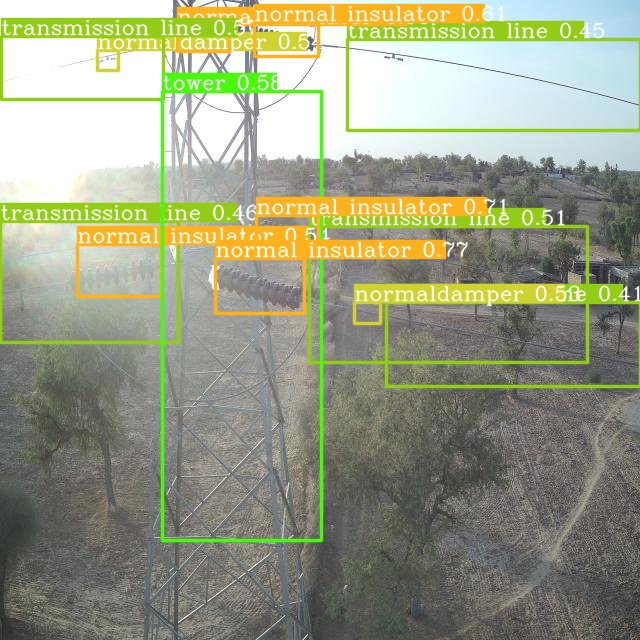

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('.'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1